In [1]:
import pandas as pd

housing = pd.read_csv("./BostonHousing.csv")
housing.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


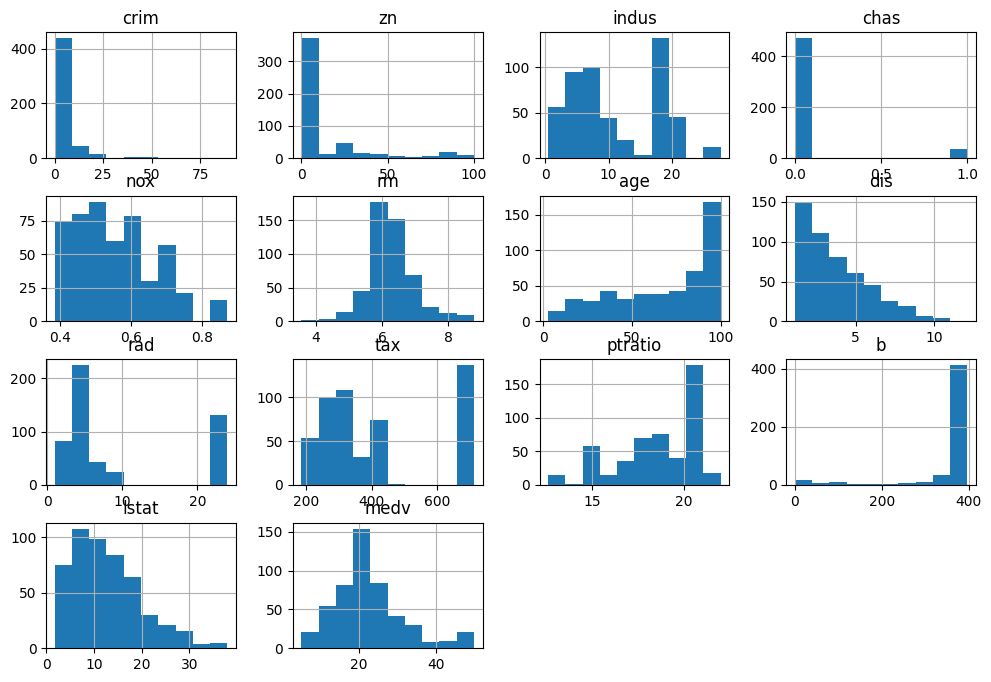

In [3]:
import matplotlib.pyplot as plt
housing.hist(figsize=(12,8))
plt.show()

In [4]:
housing['medv_category'] = pd.cut(housing['medv'], bins=[0, 15, 20, 25, 30, 50], labels=[1, 2, 3, 4, 5])
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,medv_category
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,5
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,5


In [5]:
"""
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["medv_category"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
"""

'\nfrom sklearn.model_selection import StratifiedShuffleSplit\n\nsplitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)\nstrat_splits = []\nfor train_index, test_index in splitter.split(housing, housing["medv_category"]):\n    strat_train_set_n = housing.iloc[train_index]\n    strat_test_set_n = housing.iloc[test_index]\n    strat_splits.append([strat_train_set_n, strat_test_set_n])\n'

In [6]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["medv_category"], random_state=42)

In [7]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("medv_category", axis=1, inplace=True)

In [8]:
strat_train_set

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
95,0.12204,0.0,2.89,0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65,28.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
424,8.79212,0.0,18.10,0,0.584,5.565,70.6,2.0635,24,666,20.2,3.65,17.16,11.7
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7
196,0.04011,80.0,1.52,0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,6,432,17.8,395.59,10.16,22.8
49,0.21977,0.0,6.91,0,0.448,5.602,62.0,6.0877,3,233,17.9,396.90,16.20,19.4


In [9]:
housing = strat_train_set.copy()

In [10]:
corr_matrix = housing.corr()
corr_matrix["medv"].sort_values(ascending=False)

medv       1.000000
rm         0.698954
zn         0.368301
b          0.333928
dis        0.264643
chas       0.171500
rad       -0.375739
crim      -0.391977
age       -0.394896
nox       -0.436271
tax       -0.469821
ptratio   -0.495863
indus     -0.497123
lstat     -0.745065
Name: medv, dtype: float64

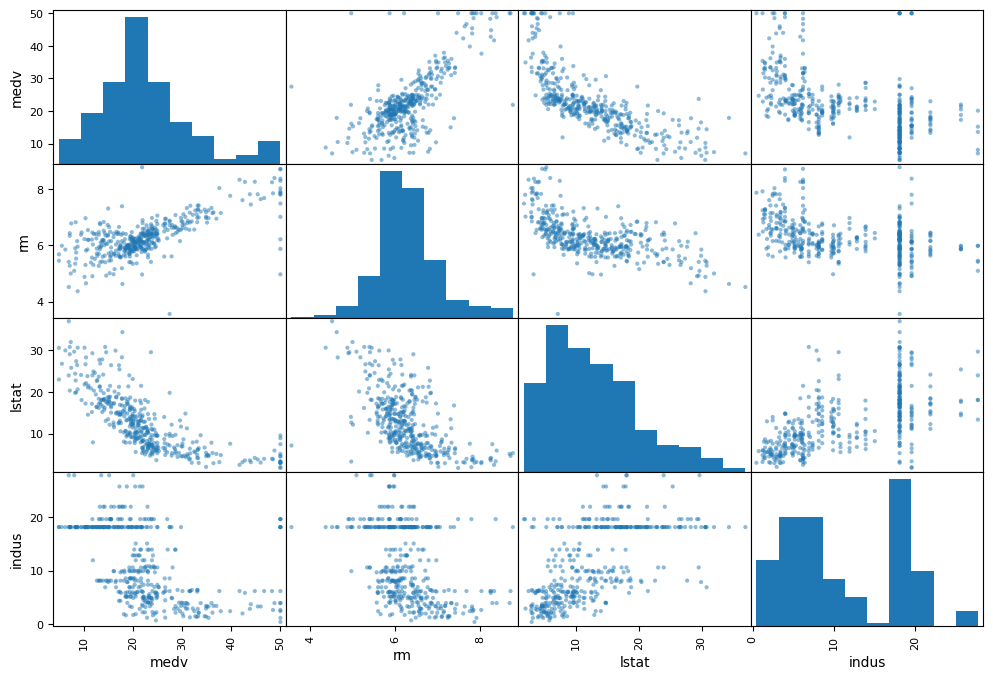

In [11]:
from pandas.plotting import scatter_matrix

attributes = ["medv", "rm", "lstat","indus"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

In [12]:
housing = strat_train_set.copy()
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

In [13]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.702915,11.737624,11.170347,0.066832,0.554289,6.297693,68.403218,3.851284,9.400990,407.311881,18.411881,356.213738,12.672500
std,9.040485,23.828179,6.917441,0.250040,0.120268,0.703232,28.300216,2.169627,8.663411,167.837203,2.182949,91.718933,7.074405
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.447000,5.886500,43.625000,2.060800,4.000000,279.000000,16.900000,374.710000,6.915000
50%,0.229480,0.000000,9.690000,0.000000,0.532000,6.217500,77.700000,3.239250,5.000000,330.000000,18.900000,391.440000,11.395000
75%,3.569675,12.500000,18.100000,0.000000,0.624000,6.618250,94.100000,5.315650,24.000000,666.000000,20.200000,396.210000,17.127500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
import numpy as np

default_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.log1p, feature_names_out="one-to-one"), StandardScaler())

preprocessing = ColumnTransformer([
    ("log", log_pipeline, ["crim", "zn", "b", "lstat", "dis"]),
], remainder=default_pipeline)

In [15]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape
preprocessing.get_feature_names_out()

array(['log__crim', 'log__zn', 'log__b', 'log__lstat', 'log__dis',
       'remainder__indus', 'remainder__chas', 'remainder__nox',
       'remainder__rm', 'remainder__age', 'remainder__rad',
       'remainder__tax', 'remainder__ptratio'], dtype=object)

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

C:\Users\Semih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['crim', 'zn', 'b', 'lstat',
                                                   'dis'])])),
                ('linearregression', LinearRegression())])

In [17]:
housing_predictions = lin_reg.predict(strat_test_set)
housing_predictions[:10].round(1)

array([24.6, 24.4,  5.6, 17.4, 12.6, 34. , 32.6, 16. , 15.9, 34.7])

In [18]:
strat_test_set["medv"][:10].values

array([23. , 24.7, 13.8, 18.2, 13.4, 35.2, 28.2, 19.6, 23.2, 37.3])

In [19]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(strat_test_set["medv"], housing_predictions, squared=False)
lin_rmse

C:\Users\Semih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4.052629740531627

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

C:\Users\Semih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['crim', 'zn', 'b', 'lstat',
                                                   'dis'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [21]:
housing_predictions = tree_reg.predict(strat_test_set)
tree_rmse = mean_squared_error(strat_test_set["medv"], housing_predictions, squared=False)

tree_rmse

C:\Users\Semih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


4.288699240617204

In [22]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [23]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      4.409259
std       1.431170
min       3.073150
25%       3.494507
50%       3.577735
75%       5.202480
max       6.815764
dtype: float64

In [24]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)

In [25]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      3.280992
std       0.884124
min       2.162510
25%       2.742694
50%       3.073196
75%       3.555281
max       5.141464
dtype: float64

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = {
    'random_forest__max_features': [1,2,3,4,5,6,7,8,9,10,11,12,13]
}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

grid_search.best_params_

{'random_forest__max_features': 6}

In [27]:
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42, max_features=6))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

count    10.000000
mean      3.082847
std       0.639870
min       1.971028
25%       2.716736
50%       3.094018
75%       3.524875
max       3.929541
dtype: float64

In [28]:
forest_reg.fit(housing, housing_labels)
predictions = forest_reg.predict(strat_test_set)
predictions[:5]

array([24.388, 24.3  , 18.964, 19.31 , 11.81 ])

In [29]:
strat_test_set["medv"][:5]

326    23.0
43     24.7
374    13.8
19     18.2
435    13.4
Name: medv, dtype: float64